In [1]:
import pyodbc 
import pandas as pd
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=TAB-6061-PSRM\TEST;'
                      'Database=HRI-ED;'
                      'Trusted_Connection=yes;')

cursor = conn.cursor()

In [2]:
df = pd.read_sql_query('''
SELECT *
FROM [HRI-ED].[dbo].[ED Instance Info]
''',conn) 


In [3]:
cursor.close()
conn.close()

In [4]:
df.head()

,INSTANCE_NUMBER,CONTEXT,STATUS_NAME,LOCAADD,LOCACITY,LOCAPRO,LOCAPC,LOCACOUNTRY,OWNERNAME,MAINTAININGCONTRACTOR,...,PowerOperLanding Doors? (Y/N),UncontLowSpeedProtMakeModel,AltRecallLvlProv,EmerPowerSupplyProvided,CtrlValveMakeandModel,Electronic Edge Front Map,Electronic Edge Rear Map,Accessible to Public? (Y/N),AscCarOSProtectMake/Model,Automatic orManual Initiation
0,61378,ED Elevators,EXPIRED,71 QUEEN ST,PICTON,ON,K0K 2T0,CA,FRASER HOUSE RETIREMENT HOME,KONE INC - OTTAWA,...,None,None,None,None,None,None,None,None,None,None
1,40174,ED Elevators,EXPIRED,89 KING ST,LONDON,ON,N6A 1C1,CA,MAGNATRUS LTD,None,...,None,None,None,None,None,None,None,None,None,None
2,39539,ED Elevators,EXPIRED,111 ISABELLA ST,PARRY SOUND,ON,P2A 1N2,CA,NEAR NORTH DISTRICT SCHOOL BOARD,"SAVARIA SALES, INSTALLATION AND SERVICE INC.",...,None,None,None,None,None,None,None,None,None,None
3,40172,ED Elevators,EXPIRED,330 SPARKS ST,OTTAWA,ON,K1R 7R9,CA,O & Y ENTERPRISE INC,None,...,None,None,None,None,None,None,None,None,None,None
4,37843,ED Elevators,Active,201 HIGH ST,SOUTHAMPTON,ON,N0H 2L0,CA,TOWN OF SAUGEEN SHORES DEPT OF COMMUNITY SERVICES,DELTA ELEVATOR COMPANY LIMITED,...,None,None,None,None,None,None,None,None,None,None


In [5]:
df.shape

(77195, 80)

In [6]:
df.columns

Index(['INSTANCE_NUMBER', 'CONTEXT', 'STATUS_NAME', 'LOCAADD', 'LOCACITY',
       'LOCAPRO', 'LOCAPC', 'LOCACOUNTRY', 'OWNERNAME',
       'MAINTAININGCONTRACTOR', 'Federal Device', 'Building Function',
       'TSSA Created Date', 'ED Created Date', 'TSSA Years in Service',
       'Door Reopening Device', 'FEDDEVICE', 'USAGE_RATE', 'USER_FACTOR',
       'Device Class ', 'Front Entrance Type ', 'Rear / Side Entrance Type ',
       'Interlock Make and Model ', 'Fr Car DoorGate Opr MakeandMod',
       'Rr Car DoorGate Opr MakeandMod', 'Car Door / Gate Type Front ',
       'Car Door/Gate Type Rear/Side ', 'Suspension Type ',
       'Car Safety Make and Model ', 'Car Safety Type ', 'Device Type ',
       'Car Governor Make / Model ', 'CWT Safety Make and Model ',
       'CWT Governor Make and Model ', 'Code Edition of Fire Service ',
       'Applied Code ', 'Safe bulkorDoubleCylinder',
       'Cylinder Corrosion Protection ', 'Building Type ', 'Carriage Type ',
       'Type of Operation ', '

In [9]:
df['STATUS_NAME'].value_counts().sort_index()

Active                  60974
CREATED IN ERROR           46
Customer Shutdown        2342
Dismantled               1508
EXPIRED                  9583
Inactive                  260
Registered               1276
TSSA Shutdown            1044
Under Review              148
Undergoing Major Alt       14
Name: STATUS_NAME, dtype: int64

In [10]:
df['STATUS_NAME'].value_counts()

Active                  60974
EXPIRED                  9583
Customer Shutdown        2342
Dismantled               1508
Registered               1276
TSSA Shutdown            1044
Inactive                  260
Under Review              148
CREATED IN ERROR           46
Undergoing Major Alt       14
Name: STATUS_NAME, dtype: int64

In [25]:
df[df['STATUS_NAME']=='Active']['LOCAPC'].describe()

count       60974
unique      25403
top       L5P 1B2
freq          189
Name: LOCAPC, dtype: object

In [12]:
df['LOCAPC'].describe()

count       77195
unique      28389
top       L5P 1B2
freq          234
Name: LOCAPC, dtype: object

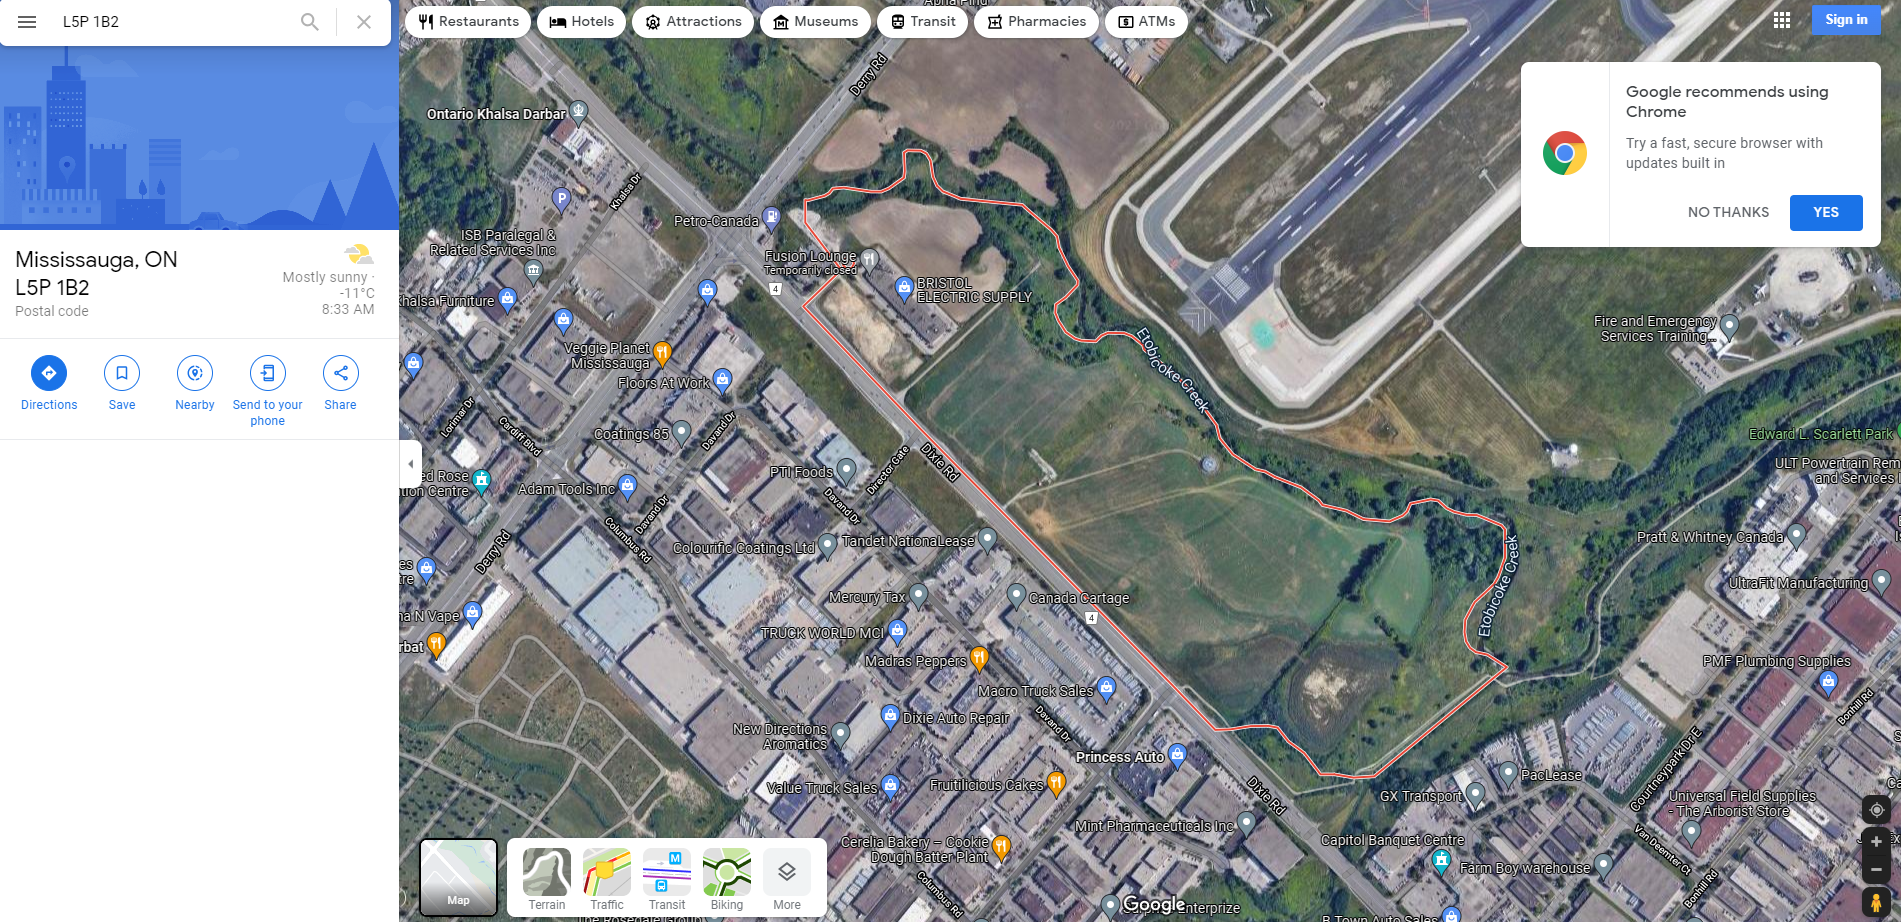

In [14]:
df['LOCAPC'].value_counts()

L5P 1B2    234
M0M 1A1    163
N0G 2T0    158
N0G 2H0    150
M3J 1P3    124
          ... 
P0K 1C0      1
L9W 6S3      1
N8S 1Z9      1
M6P 3M7      1
N9Y 2G1      1
Name: LOCAPC, Length: 28389, dtype: int64

In [27]:
df[df['STATUS_NAME']=='Active']['LOCACITY'].value_counts()

TORONTO         15311
OTTAWA           5075
MISSISSAUGA      3059
LONDON           2035
HAMILTON         1857
                ...  
BLUEVALE            1
BURNSTOWN           1
MUNCEY              1
FREELTON            1
OTTER RAPIDS        1
Name: LOCACITY, Length: 840, dtype: int64

In [ ]:
#ounces.replace([98, 99], np.nan, inplace=True) ## replace 98 and 99 values with nan in that column

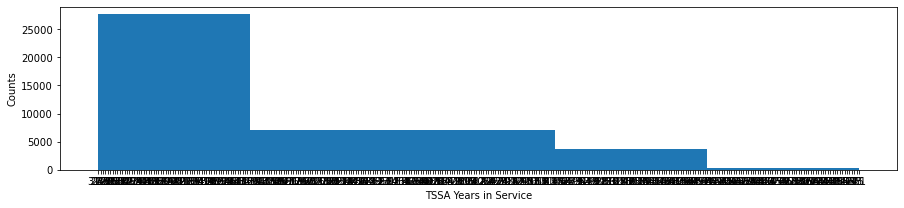

In [28]:
## Histogram

import matplotlib.pyplot as plt

plt.figure(figsize=(15,3))
plt.hist(df[df['STATUS_NAME']=='Active']['TSSA Years in Service'].dropna(), bins=5)
plt.xlabel('TSSA Years in Service')
plt.ylabel('Counts')
plt.show()

## Resampling  ?
NSFG is not representative \
Some groups are "oversampled" \
We can correct using resample_rows_weighted()

In [ ]:
# Probability mass functions

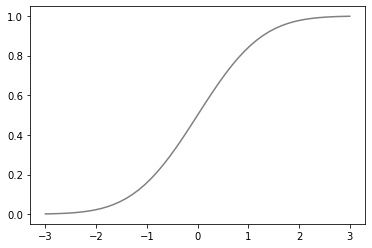

In [43]:
from scipy.stats import norm
xs = np.linspace(-3, 3)
ys = norm(0, 1).cdf(xs)
plt.plot(xs, ys, color='gray')


<AxesSubplot:ylabel='Density'>

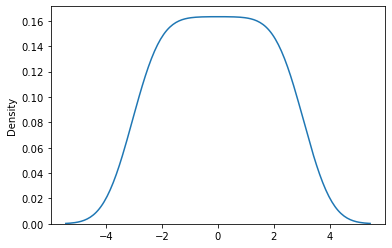

In [44]:
import seaborn as sns
sns.kdeplot(xs)

<AxesSubplot:ylabel='Density'>

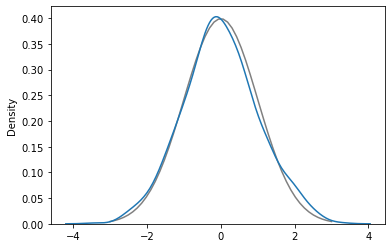

In [45]:
xs = np.linspace(-3, 3)
ys = norm.pdf(xs)
plt.plot(xs, ys, color='gray')
sns.kdeplot(sample)

## Modeling distributions
KDE: kernel density estimation: It’s a way of getting from PMF to PDF \
For sample, in order to identify the distribution type compare the KDE to PDF of distributions \

Use CDFs for exploration. \
Use PMFs if there are a small number of unique values. \
Use KDE if there are a lot of values


# Exploring relationships

In [ ]:
## adding noise or jitter to variables

height_jitter = height + np.random.normal(0, 2, size=len(brfss))
weight_jitter = weight + np.random.normal(0, 2, size=len(brfss))
plt.plot(height_jitter, weight_jitter, 'o', markersize=1, alpha=0.01)
plt.axis([140, 200, 0, 160])
plt.show()

In [ ]:
## Violin plot

data = brfss.dropna(subset=['AGE', 'WTKG3'])
sns.violinplot(x='AGE', y='WTKG3', data=data, inner=None)
plt.show()

In [ ]:
## Box plot

sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)
plt.show()

In [ ]:
## Log scale

sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)
plt.yscale('log')
plt.show()

# Correlation

Corrolation only shows linear relationship. Small values of corrolation might imply nonlinear relationship between vriables rather than no corollation.  

In [ ]:
df.corr()

# Simple regression

In [ ]:
from scipy.stats import linregress

res = linregress(xs, ys)

In [48]:
# Plot the line 

fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-')

In [ ]:
## Multiple regression

import statsmodels.formula.api as smf

results = smf.ols('INCOME2 ~ _VEGESU1', data=brfss).fit()
results.params

In [ ]:
results = smf.ols('realinc ~ educ + age', data=gss).fit()
results.params

In [ ]:
gss['age2'] = gss['age']**2
model = smf.ols('realinc ~ educ + age + age2', data=gss)
results = model.fit()
results.params

## Logistic regression

In [ ]:
formula = 'realinc ~ educ + educ2 + age + age2 + C(sex)'
results = smf.ols(formula, data=gss).fit()
results.params

In [ ]:
formula = 'gunlaw ~ age + age2 + educ + educ2 + C(sex)'
results = smf.logit(formula, data=gss).fit()
results.params

In [ ]:
# Generating predictions
df = pd.DataFrame()
df['age'] = np.linspace(18, 89)
df['educ'] = 12
df['age2'] = df['age']**2
df['educ2'] = df['educ']**2
df['sex'] = 1
pred1 = results.predict(df)
df['sex'] = 2
pred2 = results.predict(df)

In [ ]:
## Visualizing results
grouped = gss.groupby('age')
favor_by_age = grouped['gunlaw'].mean()
plt.plot(favor_by_age, 'o', alpha=0.5)
plt.plot(df['age'], pred1, label='Male')
plt.plot(df['age'], pred2, label='Female')
plt.xlabel('Age')
plt.ylabel('Probability of favoring gun law')
plt.legend()